<a href="https://colab.research.google.com/github/caua-braga-de-lima/mandacaru_desafio_parte_2_time_9/blob/evandro/DESAFIO2_MODELOS_RUS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MODELOS - UTILIZANDO BALANCEMANTO RUS (RANDOM UNDER SAMPLING)

#TRATAMENTO DE DADOS

## IMPORTAÇÕES

In [1]:
import numpy as np
import pandas as pd
import nltk
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.corpus import stopwords
nltk.download('stopwords')
#biblioteca para remover link
import re
from sklearn.utils import resample
#biblioteca para nuvem de palavras
from wordcloud import WordCloud
import matplotlib.pyplot as plt


#uteis para modelagem
from sklearn.model_selection import GridSearchCV

# Para o balanceamento de subamostragem
from imblearn.under_sampling import RandomUnderSampler

from sklearn.model_selection import train_test_split

from sklearn.neural_network import MLPClassifier

from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors	import	KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
#importando e salvando o dataset
dataset = pd.read_csv("data.csv")

In [3]:
#pegando as noticias e salvando em uma nova variavel
noticia = dataset.Sentence

In [4]:
#pegando os sentimentos e salvando em uma nova variavel
sentimento = dataset.Sentiment

In [5]:
#remoção de noticias paralelamente com o sentimento atrelado
boole = noticia.duplicated()

noticia_nao_repetida = []
sentimento_nao_repetido = []

for i in range(len(noticia)):
  if not boole[i]:
    noticia_nao_repetida.append(noticia[i])
    sentimento_nao_repetido.append(sentimento[i])

In [6]:
def remove_links(sentence):
    # Padrão de expressão regular para identificar links
    link_pattern = re.compile(r'https?://\S+|www\.\S+')

    # Substitui os links por uma string vazia
    sentence_without_links = re.sub(link_pattern, '', sentence)

    return sentence_without_links

# Exemplo de uso
noticia_sem_links = [remove_links(sentenca) for sentenca in noticia_nao_repetida]

In [7]:
#tokenização
noticia_tokens = [nltk.word_tokenize(noticia) for noticia in noticia_sem_links]

In [8]:
#normalização das noticia
#declarando a lista noticia_normalizado com seu tamanho para depois povoar com
#as palavras normalizadas
noticia_normalizado = [None]*len(noticia_tokens)
for i in range (len(noticia_tokens)):
  noticia_normalizado[i] = [word.lower() for word in noticia_tokens[i] if word.isalnum()]

In [9]:
noticia_normalizado[1]

['esi', 'on', 'lows', 'down', 'to', 'bk', 'a', 'real', 'possibility']

In [10]:
#normalização dos sentimentos
sentimento_normalizado = [word.lower() for word in sentimento_nao_repetido if word.isalpha]

In [11]:
#remover as stop words
noticia_filtrado = [None]*len(noticia_normalizado)
stop_words = set(stopwords.words('english'))
for i in range (len(noticia_normalizado)):
  noticia_filtrado[i] = [token.lower() for token in noticia_normalizado[i] if not token in stop_words]

In [12]:
#lematização das noticias
lematizador = WordNetLemmatizer()
noticia_lematizado = [None]*len(noticia_filtrado)
for i in range (len(noticia_tokens)):
  noticia_lematizado[i] = [lematizador.lemmatize(token) for token in noticia_filtrado[i]]

In [13]:
novo_dataset = pd.DataFrame({'Sentence':noticia_lematizado, 'Sentiment':sentimento_normalizado})

In [14]:
novo_dataset

,Sentence,Sentiment
0,"[geosolutions, technology, leverage, benefon, ...",positive
1,"[esi, low, bk, real, possibility]",negative
2,"[last, quarter, 2010, componenta, net, sale, d...",positive
3,"[according, chamber, commerce, major, construc...",neutral
4,"[swedish, buyout, firm, sold, remaining, perce...",neutral
...,...,...
5317,"[hsbc, say, unit, book, 585, million, charge, ...",negative
5318,"[daily, mail, parent, company, talk, potential...",positive
5319,"[nordic, walking, first, used, summer, trainin...",neutral
5320,"[according, shipping, company, viking, line, e...",neutral


### BALANCEAMENTO

In [ ]:
# #UNDERSAMPLING QUE DEU CERTOOOOOO
# # Calcular a contagem de cada classe
# counts = novo_dataset['Sentiment'].value_counts()

# # Encontrar o sentimento com o menor número de instâncias
# sentimento_minimo = counts.idxmin()

# # Inicializar um DataFrame vazio para armazenar os subconjuntos balanceados
# dfs_balanceados = []

# # Iterar sobre cada classe
# for sentimento in counts.index:
#     # Dividir o DataFrame em subconjuntos por classe
#     df_classe = novo_dataset[novo_dataset['Sentiment'] == sentimento]

#     # Se não for a classe com o menor número de instâncias, realizar undersampling
#     if sentimento != sentimento_minimo:
#         df_classe_downsampled = resample(df_classe, replace=False, n_samples=counts[sentimento_minimo], random_state=42)
#         dfs_balanceados.append(df_classe_downsampled)
#     else:
#         # Se for a classe com o menor número de instâncias, adicionar diretamente ao DataFrame balanceado
#         dfs_balanceados.append(df_classe)

# # Combinar os subconjuntos balanceados
# df_balanceado = pd.concat(dfs_balanceados)

# # Exibir o DataFrame balanceado
# print(df_balanceado)

In [ ]:
# df_balanceado['Sentiment'].value_counts()

neutral     592
positive    592
negative    592
Name: Sentiment, dtype: int64

### ANALISES E EXPLORAÇÃO

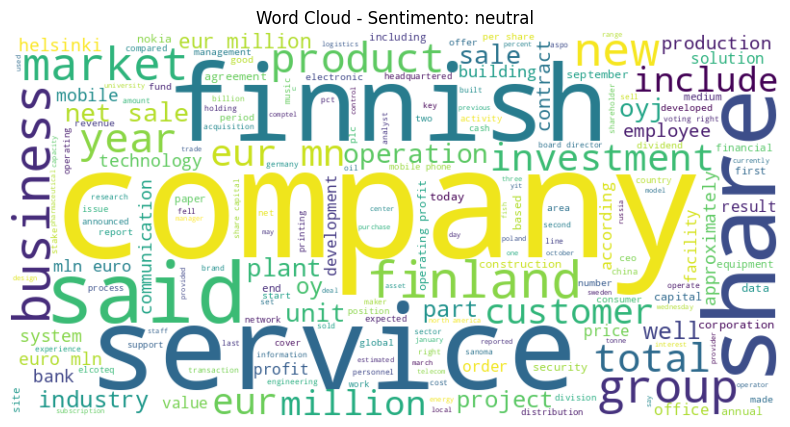

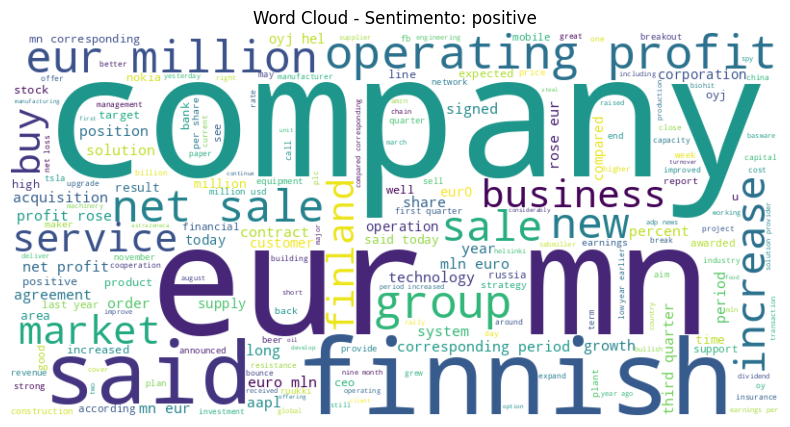

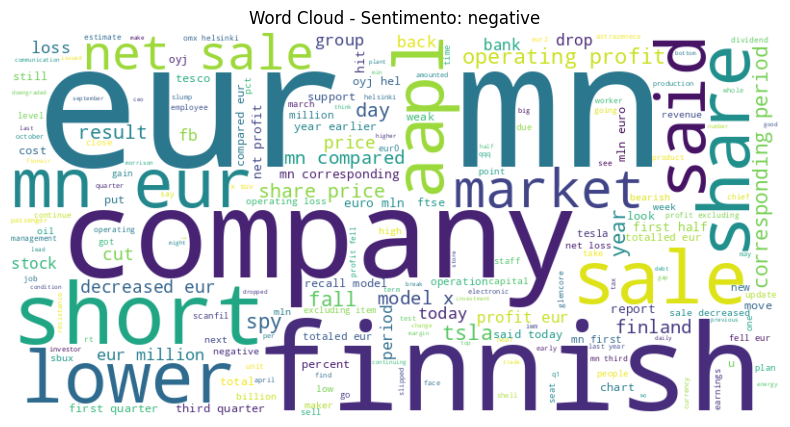

In [ ]:
#ANÁLISE E EXPLORAÇÃO DE DADOS

#nuvem de palavra
# Juntar todas as palavras tokenizadas em uma única string para cada sentimento
texto_sentimento = {}
for sentimento in df_balanceado['Sentiment'].unique():
    tokenized_news = df_balanceado[df_balanceado['Sentiment'] == sentimento]['Sentence'].values
    texto_sentimento[sentimento] = ' '.join([' '.join(tokens) for tokens in tokenized_news])

# Criar e exibir a nuvem de palavras para cada sentimento
for sentimento, texto in texto_sentimento.items():
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud - Sentimento: {sentimento}')
    plt.axis('off')
    plt.show()

#MODELAGEM

###Grid Search



Auxilia na determinação de valores adequados para os hiperparâmetros e no controle da complexidade do modelo.

**Hiperparâmetros MLP:**

- **hidden_layer_sizes:** Número de neurônios e camadas ocultas

- **activation:** Função de ativação

- **solver:** Otimizador

**Hiperparâmetros SVM:**

- **kernel:** Especifica o tipo de kernel a ser usado no algoritmo

**Hiperparâmetros Árvores de Decisão:**

- **max_depth:** Especifica a profundidade máxima da árvore de decisão. Uma árvore com uma profundidade maior pode capturar relações mais complexas nos dados, mas também pode ser mais propensa a overfitting.

- **min_samples_split:** É o número mínimo de amostras necessárias para que um nó seja dividido durante a construção da árvore. Aumentar esse valor pode evitar divisões desnecessárias em nós com poucas amostras e contribuir para a regularização do modelo.

- **min_samples_leaf:** É o número mínimo de amostras necessárias em uma folha da árvore. Aumentar esse valor pode evitar folhas com poucas amostras e contribuir para a regularização do modelo.

**Hiperparâmetros KNN:**

- **n_neighbors:**   Número de vizinhos a serem usados;
- **weights:** Função de peso usada na previsão.

**Hiperparâmetros Random Forest:**

- **n_estimators:** Número de árvores de decisão independentes da floresta aleatória.
- **max_depth:** Profundidade máxima de cada uma delas.

Para conjuntos de dados pequenos ou moderadamente grandes, é recomendado que o balanceamento das classes seja realizado antes da divisão entre treino e teste.

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vetorizar as frases usando TF-IDF
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(novo_dataset['Sentence'].apply(lambda x: ' '.join(x)))

# Criar um novo DataFrame com os dados vetorizados e as classes
novo_dataset_vectorized = pd.DataFrame(X_vectorized.toarray(), columns=vectorizer.get_feature_names_out())
novo_dataset_vectorized['Sentiment'] = novo_dataset['Sentiment']

# Dividir entre treino e teste
X = novo_dataset_vectorized.drop('Sentiment', axis=1)
y = novo_dataset_vectorized['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
X_train

,00,000,000063,0025,0030,0491,0711,0762,087,10,...,zip,zloty,znga,zoltan,zone,zoo,zsl,zte,zu,zurich
511,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3469,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1361,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3092,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3772,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(4257, 9437)
(1065, 9437)
(4257,)
(1065,)


In [18]:
# RUS ef
subamost = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = subamost.fit_resample(X, y)

In [19]:
print(X_resampled.shape)
print(y_resampled.shape)

print(y_train.shape)
print(y_test.shape)

(1776, 9437)
(1776,)
(4257,)
(1065,)


In [20]:
def grid_search(X_train, y_train, param_grid, model):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
    grid_search.fit(X_train, y_train)

    print("Melhores hiperparâmetros:", grid_search.best_params_)
    print("Acurácia no conjunto de teste:", grid_search.best_estimator_.score(X_test, y_test))
    print("Melhor Pontuação de validação cruzada: ", grid_search.best_score_)

### Grid Search para MLP:

In [21]:
# UNDERSAMPLING

param_grid_mlp = {
    'hidden_layer_sizes': [(100,), (50, 50), (100, 100), (100, 100, 100)],
    # 'hidden_layer_sizes': [50, 100, 200],
    'activation': ['relu'],
    'solver': ['sgd', 'adam']
}

mlp = MLPClassifier()

In [22]:
 #Grid Search MLP RUS - deeu ruim a mlp
grid_search(X_resampled, y_resampled, param_grid_mlp, mlp)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Melhores hiperparâmetros: {'activation': 'relu', 'hidden_layer_sizes': (100, 100, 100), 'solver': 'adam'}
Acurácia no conjunto de teste: 0.7492957746478873
Melhor Pontuação de validação cruzada:  0.6244310808672259


###grid pra svm

In [23]:
from sklearn.svm import SVC

param_grid_svm = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}
model_svm = svm.SVC()

In [24]:
# GRID Search para SVM com RUS
grid_search(X_resampled, y_resampled, param_grid_svm, model_svm)

Melhores hiperparâmetros: {'kernel': 'linear'}
Acurácia no conjunto de teste: 0.7633802816901408
Melhor Pontuação de validação cruzada:  0.6514749169172338


###grid random forest

In [25]:
param_grid_tree = {'max_depth': [None, 5, 10, 15],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4]}

model_tree = DecisionTreeClassifier()

In [26]:
#  GRID Search para Arvore Decisao com RUS
grid_search(X_resampled, y_resampled, param_grid_tree, model_tree)

Melhores hiperparâmetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Acurácia no conjunto de teste: 0.7126760563380282
Melhor Pontuação de validação cruzada:  0.5675739832251939


### Grid Search para KNN:

In [27]:
param_grid_knn = {'n_neighbors': [3, 5, 7],
                  'weights': ['uniform', 'distance']}

model_knn = KNeighborsClassifier()

In [28]:
#  GRID Search para KNN com RUS
grid_search(X_resampled, y_resampled, param_grid_knn, model_knn)

Melhores hiperparâmetros: {'n_neighbors': 7, 'weights': 'distance'}
Acurácia no conjunto de teste: 0.692018779342723
Melhor Pontuação de validação cruzada:  0.5979806931476499


###grid pra random forest

In [29]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10]}

model_rf = RandomForestClassifier()

In [30]:
#  GRID Search para RF com RUS
grid_search(X_resampled, y_resampled, param_grid_rf, model_rf)

Melhores hiperparâmetros: {'max_depth': None, 'n_estimators': 200}
Acurácia no conjunto de teste: 0.7643192488262911
Melhor Pontuação de validação cruzada:  0.648646937806615
